<a href="https://colab.research.google.com/github/Tamil-palace/ML-Practices/blob/master/Press_Conferance_Text_Classification_grouping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## importing necessary modules 
import requests
from bs4 import BeautifulSoup
## function to scrape transcript data from rev.com
def url_to_transcript(url):
    page = requests.get(url).text 
    soup = BeautifulSoup(page, "lxml") 
    text = [p.text for p in soup.find(class_="fl-callout-text").find_all('p')]
    print(url)
    return text
## URLs of transcripts 
urls = ['https://www.rev.com/blog/transcripts/donald-trump-coronavirus-press-conference-transcript-july-27-talks-testing-and-vaccine-development',
       'https://www.rev.com/blog/transcripts/joe-biden-speech-transcript-on-coronavirus-outbreak-june-30-in-delaware',
       'https://www.rev.com/blog/transcripts/ny-governor-cuomo-covid-19-press-conference-transcript-august-3',
       'https://www.rev.com/blog/transcripts/florida-governor-ron-desantis-august-3-press-conference-transcript',
       'https://www.rev.com/blog/transcripts/california-governor-gavin-newsom-august-3-press-conference-transcript',
       'https://www.rev.com/blog/transcripts/arizona-governor-doug-ducey-press-conference-transcript-july-23',
       'https://www.rev.com/blog/transcripts/new-jersey-governor-phil-murphy-press-conference-transcript-july-31',
       'https://www.rev.com/blog/transcripts/al-governor-kay-ivey-covid-19-press-conference-july-29']
## requesting transcripts
transcripts = [url_to_transcript(u) for u in urls]
transcripts

https://www.rev.com/blog/transcripts/donald-trump-coronavirus-press-conference-transcript-july-27-talks-testing-and-vaccine-development
https://www.rev.com/blog/transcripts/joe-biden-speech-transcript-on-coronavirus-outbreak-june-30-in-delaware
https://www.rev.com/blog/transcripts/ny-governor-cuomo-covid-19-press-conference-transcript-august-3
https://www.rev.com/blog/transcripts/florida-governor-ron-desantis-august-3-press-conference-transcript
https://www.rev.com/blog/transcripts/california-governor-gavin-newsom-august-3-press-conference-transcript
https://www.rev.com/blog/transcripts/arizona-governor-doug-ducey-press-conference-transcript-july-23
https://www.rev.com/blog/transcripts/new-jersey-governor-phil-murphy-press-conference-transcript-july-31
https://www.rev.com/blog/transcripts/al-governor-kay-ivey-covid-19-press-conference-july-29


[['Donald Trump: (00:00) In the thereafter. Not only his Operation Warp Speed, accelerating the development of a vaccine, we’re also directing a colossal industrial mobilization to ensure its rapid delivery. Nothing’s happened like this since the end of World War II. Instead of the usual sequence of vaccine development, testing and trials, followed by production, our strategy is to conduct these phases simultaneously, so everything goes at one time. We’re not waiting and waiting and waiting. It’s all going at one time. We have a system that has, I think it’s unparalleled, has never been done before, but we suspect it’s going to work and work very well. We’re mass-producing all of the most promising vaccine candidates in advance so that on the day one, that it’s approved, it will be available to the American people immediately and we’ll probably have a lot for a lot of other people throughout the world.',
  'Donald Trump: (00:57) The world is suffering from this China virus. Another dim

In [ ]:
!mkdir transcripts

In [ ]:
import pickle
politicians = ['Donald Trump', 'Joe Biden', 'Andrew Cuomo', 'Ron DeSantis', 'Gavin Newsom', 'Doug Ducey','Phil Murphy', 'Kay Ivey']
names = ['Donald', 'Joe', 'Andrew', 'Governor']
for i, c in enumerate(politicians):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)
## loading pickled files as data
data = {}
for i, c in enumerate(politicians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
names = ['Donald', 'Joe', 'Andrew', 'Governor']
def cleaning(x):
    for i in range(len(politicians)):
        for paragraph in x[politicians[i]]:
            if paragraph.split()[0] not in names:
                x[politicians[i]].remove(paragraph)
    return x
                
cleaning(data)

{'Andrew Cuomo': ['Andrew Cuomo: (00:00) And New Jersey Port Authority, who’s doing been doing an extraordinary job. The Port Authority does, among other things, the administration of the airports, building the new John F. Kennedy, rebuilding JFK. So he’s been doing double duty. And we have a great announcement today that we joined in this morning, which I’m going to chat about in a moment.',
  'Andrew Cuomo: (00:26) Today’s day 156, for those who are counting. If you’re not counting, it’s still date 156. Number of hospitalizations, 536. What does that number mean? It is a new low since we were in the midst of the battle. So, that is great news. Number of COVID patients in ICU, 136. Also a new low since the height of the crisis. Number of intubations, 62. Also a new low. So, that’s great news. Number of lives lost, a new low on the three day average. Three people passed away yesterday. So this is really all great, great news. And I congratulate New Yorkers, because this is purely a res

In [ ]:
## combine the strings into one corpus
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}
## put the corpus into a pandas data frame
import pandas as pd
pd.set_option('max_colwidth',150)
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
Andrew Cuomo,"Andrew Cuomo: (00:00) And New Jersey Port Authority, who’s doing been doing an extraordinary job. The Port Authority does, among other things, the..."
Donald Trump,"Donald Trump: (00:00) In the thereafter. Not only his Operation Warp Speed, accelerating the development of a vaccine, we’re also directing a colo..."
Doug Ducey,Governor Doug Ducey: (01:15) Good afternoon everyone. Thank you for joining us. I am joined today by Superintendent of Public Instruction Kathy Ho...
Gavin Newsom,"Governor Gavin Newsom: (06:54) No. That’s not on. Good afternoon. A couple of months back, in fact on June 1st, we announced with some urgency our..."
Joe Biden,"Joe Biden: (00:00) Thanks a lot for being here. I can’t tell whether you’re smiling or not, but thanks for being here. I want to take a few minute..."
Kay Ivey,"Governor Kay Ivey: (00:02) Well, good morning, everyone. Because our safer at home or expires this Friday, July 31st at 5:00 PM, Dr. Harris now he..."
Phil Murphy,"Governor Phil Murphy: (01:02) Good afternoon and happy Friday. With me is to my right is the woman who needs no introduction, the commissioner of ..."
Ron DeSantis,"Governor DeSantis: (00:41) Well good afternoon. I want to thank Broward Health for hosting us. Before I begin, I want to thank the emergency manag..."


In [ ]:
## text cleaning techniques
import re
def clean_text(text):
    words =['andrew','cuomo','governor','joe','biden','phil',
'murphy','desantis','kay','ivey','gavin','newsom','donald',
'trump','doug','ducey']
    text = text.lower()
    text = re.sub('\(.*?\)', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[0-9]', '', text)
    text = ' '.join(i for i in text.split() if i not in words)
    return text
cleaning = lambda x: clean_text(x)
data_clean = pd.DataFrame(data_df.transcript.apply(cleaning))
data_clean

,transcript
Andrew Cuomo,and new jersey port authority whos doing been doing an extraordinary job the port authority does among other things the administration of the airp...
Donald Trump,in the thereafter not only his operation warp speed accelerating the development of a vaccine were also directing a colossal industrial mobilizati...
Doug Ducey,good afternoon everyone thank you for joining us i am joined today by superintendent of public instruction kathy hoffman thank you for being here ...
Gavin Newsom,no thats not on good afternoon a couple of months back in fact on june st we announced with some urgency our concerns about what was happening in ...
Joe Biden,thanks a lot for being here i cant tell whether youre smiling or not but thanks for being here i want to take a few minutes to tell you a little b...
Kay Ivey,well good morning everyone because our safer at home or expires this friday july st at pm dr harris now here once again to provide an update to th...
Phil Murphy,good afternoon and happy friday with me is to my right is the woman who needs no introduction the commissioner of the department of health judy pe...
Ron DeSantis,well good afternoon i want to thank broward health for hosting us before i begin i want to thank the emergency management personnel throughout the...


In [ ]:
## creating a document-term matrix using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
print(data_dtm)
data_dtm.index = data_clean.index
data_dtm
## pickling all the data files 
# data_clean.to_pickle('data_clean.pkl')
# data_dtm.to_pickle("dtm.pkl")
# pickle.dump(cv, open("cv.pkl", "wb"))

   abandon  abbott  abide  ability  able  ...  young  younger  youre  youve  zero
0        0       0      0        1     0  ...      1        0     10      2     0
1        0       1      0        0     0  ...      0        1      3      0     0
2        0       0      0        1    12  ...      0        0      8      4     0
3        0       0      1        5     9  ...      1        0     12      5     0
4        1       0      0        1     2  ...      0        0      8      3     1
5        0       0      0        1     2  ...      2        0      2      2     0
6        0       0      0        0     3  ...      3        0     11      6     2
7        0       0      0        4    21  ...      1        1     21      6     0

[8 rows x 3995 columns]


,abandon,abbott,abide,ability,able,aboard,abraham,absences,absolute,absolutely,absurd,abundant,abundantly,academic,academy,accelerating,accept,acceptable,accepted,access,accident,accomplished,according,accordingly,account,accountability,accounted,accurate,accused,achieve,achieved,achievement,acknowledge,act,action,actions,active,actively,activities,activity,...,workplace,works,world,worn,worried,worry,worse,worsen,worshipers,worst,worth,wouldnt,writ,written,wrong,wrote,xi,yall,yard,yards,yeah,year,years,yelling,yep,yes,yesterday,yesterdays,yields,yomara,york,yorkers,yorks,youd,youll,young,younger,youre,youve,zero
Andrew Cuomo,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,...,0,2,0,0,2,1,1,0,0,1,0,4,0,0,1,0,0,0,0,0,1,0,1,0,0,5,1,0,0,0,20,7,1,1,0,1,0,10,2,0
Donald Trump,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,...,0,0,10,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,3,11,4,0,0,1,0,0,1,0,0,0,0,0,2,0,1,3,0,0
Doug Ducey,0,0,0,1,12,0,0,0,0,0,0,0,0,3,1,0,0,0,0,2,0,0,1,0,0,0,1,2,0,0,0,2,1,1,1,3,0,0,0,0,...,1,0,2,1,0,0,0,0,0,1,0,2,1,1,1,1,0,0,0,0,1,19,0,0,0,4,0,1,0,0,3,0,0,1,5,0,0,8,4,0
Gavin Newsom,0,0,1,5,9,0,0,0,0,3,0,1,3,0,0,0,0,0,0,1,0,0,0,2,1,1,0,0,0,1,0,0,2,0,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,1,1,0,0,2,3,1,0,1,1,0,0,0,5,1,0,12,5,0
Joe Biden,1,0,0,1,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0,0,0,4,1,0,0,0,1,0,...,0,0,4,0,1,0,2,1,0,0,0,0,0,0,3,0,1,0,0,0,1,2,5,1,0,5,0,0,0,0,1,0,0,2,0,0,0,8,3,1
Kay Ivey,0,0,0,1,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,1,0,0,2,0,0,0,0,0,0,0,0,0,2,0,2,2,0
Phil Murphy,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2,1,2,0,4,0,3,2,...,0,1,4,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,5,7,0,0,2,3,1,1,0,1,0,0,0,1,3,0,11,6,2
Ron DeSantis,0,0,0,4,21,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,1,1,1,21,6,0


In [ ]:
## transposing the matrix
data = pd.read_pickle('dtm.pkl') 
data = data.transpose()
data.head()

,Andrew Cuomo,Donald Trump,Doug Ducey,Gavin Newsom,Joe Biden,Kay Ivey,Phil Murphy,Ron DeSantis
abandon,0,0,0,0,1,0,0,0
abbott,0,1,0,0,0,0,0,0
abide,0,0,0,1,0,0,0,0
ability,1,0,1,5,1,1,0,4
able,0,0,12,9,2,2,3,21


In [ ]:
## find the top 30 words
top_dict = {}
print(data.columns)
for c in data.columns:
    print(data[c].sort_values(ascending=False).head(5))
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
top_dict

Index(['Andrew Cuomo', 'Donald Trump', 'Doug Ducey', 'Gavin Newsom',
       'Joe Biden', 'Kay Ivey', 'Phil Murphy', 'Ron DeSantis'],
      dtype='object')
going     71
dont      43
new       43
school    38
thats     32
Name: Andrew Cuomo, dtype: int64
think      24
weve       20
going      16
million    13
year       11
Name: Donald Trump, dtype: int64
want       73
arizona    55
going      55
state      38
health     37
Name: Doug Ducey, dtype: int64
just      37
number    36
state     30
day       27
people    25
Name: Gavin Newsom, dtype: int64
president    56
think        40
know         28
dont         28
im           27
Name: Joe Biden, dtype: int64
school    13
people    12
dr        12
harris    11
going      8
Name: Kay Ivey, dtype: int64
going     38
new       27
right     25
good      25
health    23
Name: Phil Murphy, dtype: int64
really    35
going     34
think     33
people    26
youre     21
Name: Ron DeSantis, dtype: int64


{'Andrew Cuomo': [('going', 71),
  ('dont', 43),
  ('new', 43),
  ('school', 38),
  ('thats', 32),
  ('people', 32),
  ('theyre', 26),
  ('know', 23),
  ('truth', 22),
  ('plan', 21),
  ('parents', 21),
  ('york', 20),
  ('just', 20),
  ('im', 19),
  ('district', 18),
  ('mistake', 18),
  ('say', 17),
  ('look', 15),
  ('months', 15),
  ('reset', 14),
  ('safe', 13),
  ('state', 13),
  ('want', 13),
  ('questions', 13),
  ('did', 12),
  ('hit', 12),
  ('button', 12),
  ('talking', 11),
  ('come', 11),
  ('start', 11)],
 'Donald Trump': [('think', 24),
  ('weve', 20),
  ('going', 16),
  ('million', 13),
  ('year', 11),
  ('states', 11),
  ('world', 10),
  ('great', 10),
  ('just', 9),
  ('numbers', 9),
  ('thank', 9),
  ('cases', 8),
  ('right', 8),
  ('tremendous', 8),
  ('virus', 8),
  ('people', 8),
  ('thats', 8),
  ('testing', 7),
  ('good', 7),
  ('having', 7),
  ('leading', 7),
  ('lot', 7),
  ('china', 7),
  ('want', 6),
  ('vaccine', 6),
  ('like', 6),
  ('need', 6),
  ('things

In [ ]:
## top 15 words said by each politician
for politician, top_words in top_dict.items():
    print(politician)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Andrew Cuomo
going, dont, new, school, thats, people, theyre, know, truth, plan, parents, york, just, im
---
Donald Trump
think, weve, going, million, year, states, world, great, just, numbers, thank, cases, right, tremendous
---
Doug Ducey
want, arizona, going, state, health, thats, make, school, schools, thank, weve, public, dr, people
---
Gavin Newsom
just, number, state, day, people, want, county, relates, weve, positivity, contact, week, rates, thats
---
Joe Biden
president, think, know, dont, im, need, people, going, testing, doing, thats, theyre, like, country
---
Kay Ivey
school, people, dr, harris, going, just, order, mask, dont, need, schools, good, thank, thing
---
Phil Murphy
going, new, right, good, health, know, number, want, state, dont, just, jersey, thank, judy
---
Ron DeSantis
really, going, think, people, youre, just, able, state, nursing, tests, thats, weve, florida, broward
---


In [ ]:
from collections import Counter
## the top 30 words for each politician
words = []
for politician in data.columns:
    top = [word for (word, count) in top_dict[politician]]
    for t in top:
        words.append(t)
## aggregate the list and identify the most common words along with how many speeches they occur in
Counter(words).most_common()

[('people', 8),
 ('going', 7),
 ('thats', 7),
 ('just', 7),
 ('want', 7),
 ('think', 7),
 ('state', 6),
 ('know', 5),
 ('weve', 5),
 ('thank', 5),
 ('good', 5),
 ('dont', 4),
 ('testing', 4),
 ('need', 4),
 ('health', 4),
 ('time', 4),
 ('school', 3),
 ('theyre', 3),
 ('im', 3),
 ('look', 3),
 ('come', 3),
 ('cases', 3),
 ('right', 3),
 ('like', 3),
 ('make', 3),
 ('number', 3),
 ('day', 3),
 ('youre', 3),
 ('new', 2),
 ('plan', 2),
 ('say', 2),
 ('safe', 2),
 ('year', 2),
 ('states', 2),
 ('numbers', 2),
 ('lot', 2),
 ('schools', 2),
 ('dr', 2),
 ('theres', 2),
 ('covid', 2),
 ('important', 2),
 ('way', 2),
 ('mask', 2),
 ('hospitals', 2),
 ('support', 2),
 ('really', 2),
 ('days', 2),
 ('truth', 1),
 ('parents', 1),
 ('york', 1),
 ('district', 1),
 ('mistake', 1),
 ('months', 1),
 ('reset', 1),
 ('questions', 1),
 ('did', 1),
 ('hit', 1),
 ('button', 1),
 ('talking', 1),
 ('start', 1),
 ('million', 1),
 ('world', 1),
 ('great', 1),
 ('tremendous', 1),
 ('virus', 1),
 ('having', 1),
 

In [ ]:
## adding to the stop word list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 4]

In [ ]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
## read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')
## add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
## recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index
## pickle for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

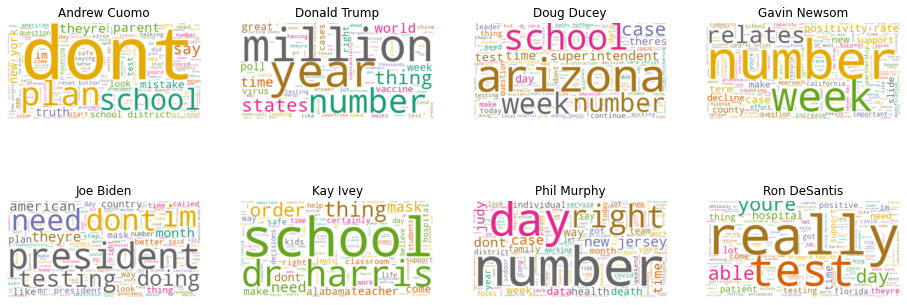

In [ ]:
## importing WordCloud 
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)
## reset the output dimensions
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,6]
politicians = ['Andrew Cuomo','Donald Trump', 'Doug Ducey', 'Gavin Newsom', 'Joe Biden','Kay Ivey','Phil Murphy','Ron DeSantis']
## Create subplots for each politician
for index, politician in enumerate(data.columns):
    wc.generate(data_clean.transcript[politician])
    plt.subplot(2, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(politicians[index])
    
plt.show()

769
584
1311
1140
1186
459
1468
804


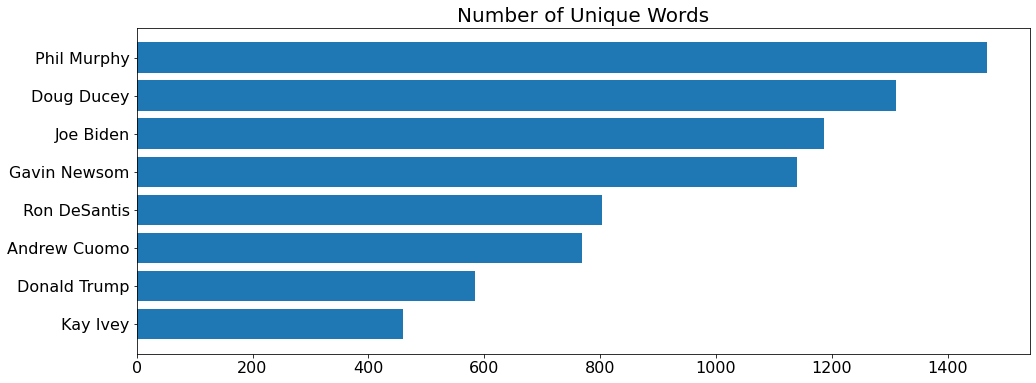

In [ ]:
## identify the non-zero items in the document-term matrix
unique_list = []
for politician in data.columns:
    print(data[politician].to_numpy().nonzero()[0].size)
    uniques = data[politician].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

## create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(politicians, unique_list)), columns=['politician', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')

## plotting 
import numpy as np
y_pos = np.arange(len(data_words))
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.politician)
plt.title('Number of Unique Words', fontsize= 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [38]:
## reading in the cleaned data
data = pd.read_pickle('data_clean.pkl')
## checking for polarity and subjectivity of each speech
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data['label'] = ['Andrew Cuomo', 'Donald Trump', 'Doug Ducey', 'Gavin Newsom', 'Joe Biden', 'Kay Ivey', 'Phil Murphy', 'Ron DeSantis']

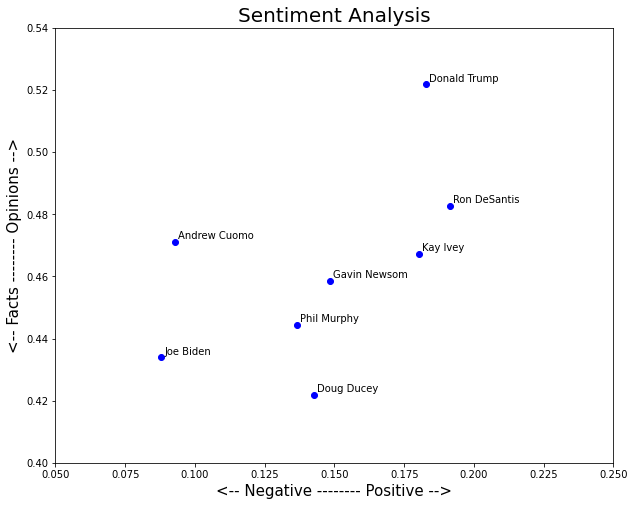

In [39]:
## plotting the results 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
for index, politician in enumerate(data.index):
    x = data.polarity.loc[politician]
    y = data.subjectivity.loc[politician]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['label'][index], fontsize=10)
    plt.xlim(.05, .25)
    plt.ylim(.40, .54)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
plt.show()

In [40]:
## split each speech into 10 parts
import numpy as np
import math
def split_text(text, n=10):
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list
## create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
## calculate the polarity for each piece of text
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.14775774461944677,
  -0.06134413634413634,
  0.1168992557150452,
  -0.03496678974620152,
  0.027088189588189593,
  0.037565308254963424,
  0.2146597246597247,
  0.16926652892561986,
  0.212983682983683,
  0.04649959415584416],
 [0.13413900913900914,
  0.14282828282828286,
  0.04263227513227513,
  0.08909523809523807,
  0.1686904761904762,
  0.28595147907647905,
  0.24128968253968255,
  0.21294642857142854,
  0.3690714285714286,
  0.1784559884559884],
 [0.11128055104617604,
  0.13740869283972734,
  0.19426459293394774,
  0.16971245421245423,
  0.16500067258541837,
  0.18136724386724384,
  0.025414003985432556,
  0.19195148489503325,
  0.1087294174622942,
  0.13997600225861095],
 [0.1942648860573389,
  0.10024195153505498,
  0.021086162833150783,
  0.18274141181399248,
  0.18964726631393297,
  0.1599656593406593,
  0.20126794258373204,
  0.1395395235649473,
  0.1734203296703297,
  0.17815235690235687],
 [0.0511360028860029,
  0.12623047242612462,
  0.14277489177489178,
  0.0457749766

In [44]:
## split each speech into 10 parts
import numpy as np
import math
def split_text(text, n=10):
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    print(split_list)
    return split_list
## create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
## calculate the polarity for each piece of text
polarity_transcript = []
print(list_pieces)
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

['and new jersey port authority whos doing been doing an extraordinary job the port authority does among other things the administration of the airports building the new john f kennedy rebuilding jfk so hes been doing double duty and we have a great announcement today that we joined in this morning which im going to chat about in a moment todays day for those who are counting if youre not counting its still date number of hospitalizations what does that number mean it is a new low since we were in the midst of the battle so that is great news number of covid patients in icu also a new low since the height of the crisis number of intubations also a new low so thats great news number of lives lost a new low on the three day average three people passed away yesterday so this is really all great great news and i congratulate new yorkers because this is purely a result of the actions that theyve been taking the progress is even better than we expected remember when we started reopening all 

[[0.14775774461944677,
  -0.06134413634413634,
  0.1168992557150452,
  -0.03496678974620152,
  0.027088189588189593,
  0.037565308254963424,
  0.2146597246597247,
  0.16926652892561986,
  0.212983682983683,
  0.04649959415584416],
 [0.13413900913900914,
  0.14282828282828286,
  0.04263227513227513,
  0.08909523809523807,
  0.1686904761904762,
  0.28595147907647905,
  0.24128968253968255,
  0.21294642857142854,
  0.3690714285714286,
  0.1784559884559884],
 [0.11128055104617604,
  0.13740869283972734,
  0.19426459293394774,
  0.16971245421245423,
  0.16500067258541837,
  0.18136724386724384,
  0.025414003985432556,
  0.19195148489503325,
  0.1087294174622942,
  0.13997600225861095],
 [0.1942648860573389,
  0.10024195153505498,
  0.021086162833150783,
  0.18274141181399248,
  0.18964726631393297,
  0.1599656593406593,
  0.20126794258373204,
  0.1395395235649473,
  0.1734203296703297,
  0.17815235690235687],
 [0.0511360028860029,
  0.12623047242612462,
  0.14277489177489178,
  0.0457749766

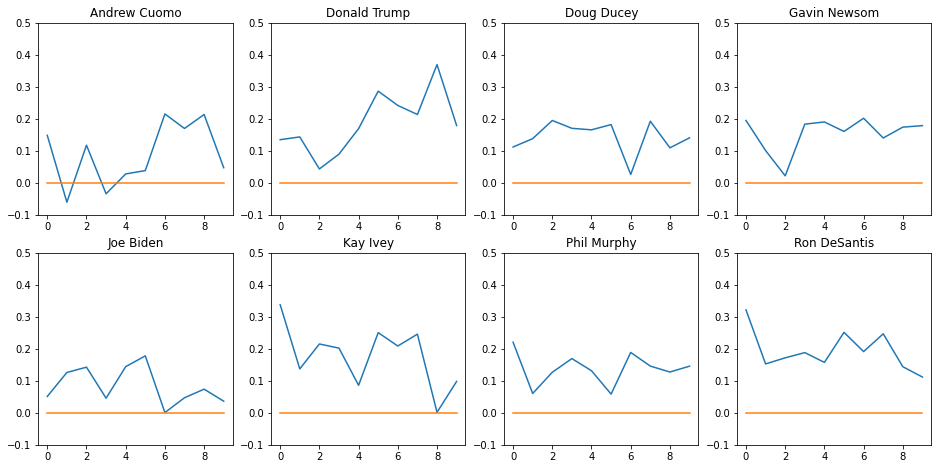

In [43]:
# Show the plot for all politicians
plt.rcParams['figure.figsize'] = [16, 12]
for index, politician in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['label'][index])
    plt.ylim(ymin=-.1, ymax=.5)
    
plt.show()

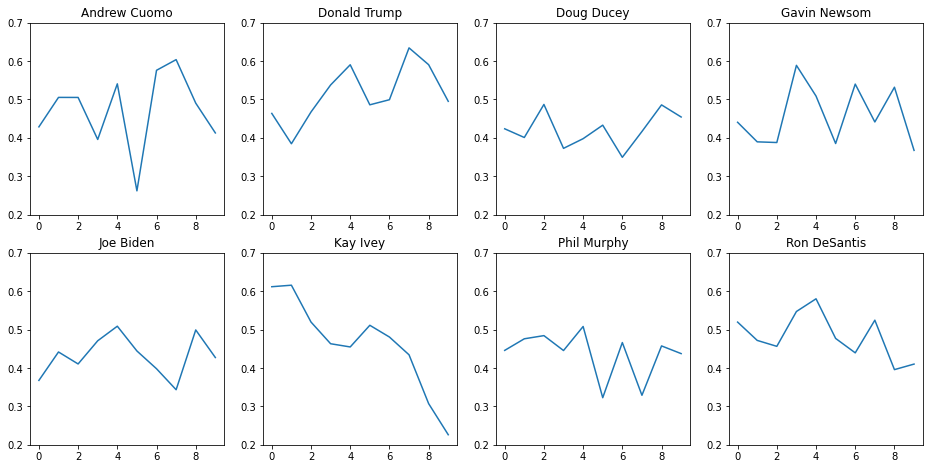

In [45]:
## calculate the subjectivity for each piece of text
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
## show the plot for all politicians
plt.rcParams['figure.figsize'] = [16, 12]
for index, politician in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['label'][index])
    plt.ylim(ymin=0.2, ymax=0.7)
    
plt.show()

In [46]:
## read in our document-term matrix

import pandas as pd
import pickle
data = pd.read_pickle('dtm_stop.pkl')

In [47]:
## import the necessary modules for LDA with gensim
from gensim import matutils, models
import scipy.sparse
import logging #for debugging 
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#transpose the matrix
tdm = data.transpose()
tdm.head()
## put the term-document matrix into a new gensim format, from df -> sparse matrix -> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)
## gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())
## now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10) 
lda.print_topics()

2020-08-08 08:16:38,076 : INFO : using symmetric alpha at 0.5
2020-08-08 08:16:38,078 : INFO : using symmetric eta at 0.5
2020-08-08 08:16:38,081 : INFO : using serial LDA version on this node
2020-08-08 08:16:38,091 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 8 documents, updating model once every 8 documents, evaluating perplexity every 8 documents, iterating 50x with a convergence threshold of 0.001000
2020-08-08 08:16:38,181 : INFO : -8.786 per-word bound, 441.5 perplexity estimate based on a held-out corpus of 8 documents with 17781 words
2020-08-08 08:16:38,182 : INFO : PROGRESS: pass 0, at document #8/8
2020-08-08 08:16:38,210 : INFO : topic #0 (0.500): 0.006*"dont" + 0.005*"school" + 0.005*"health" + 0.005*"theyre" + 0.005*"really" + 0.004*"new" + 0.004*"need" + 0.004*"right" + 0.004*"number" + 0.004*"testing"
2020-08-08 08:16:38,212 : INFO : topic #1 (0.500): 0.006*"dont" + 0.005*"number" + 0.005*"day" + 0.005*"new" + 0.00

[(0,
  '0.008*"dont" + 0.006*"health" + 0.006*"school" + 0.006*"new" + 0.005*"im" + 0.005*"need" + 0.005*"make" + 0.005*"theyre" + 0.004*"really" + 0.004*"president"'),
 (1,
  '0.007*"number" + 0.005*"day" + 0.004*"week" + 0.004*"time" + 0.004*"numbers" + 0.003*"cases" + 0.003*"relates" + 0.003*"county" + 0.003*"states" + 0.003*"positivity"')]

In [49]:
## create a function to pull out nouns and adj from a string of text
from nltk import word_tokenize, pos_tag
def nouns_adj(text):
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)
## read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
## apply the function to the transcripts to filter nouns & adj
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
print(data_nouns_adj)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
                                                                                                                                                         transcript
Andrew Cuomo  new jersey port authority whos extraordinary job port authority other things administration airports new john f kennedy jfk double duty great anno...
Donald Trump  thereafter operation speed development vaccine colossal industrial mobilization rapid delivery nothings end world war ii usual sequence vaccine de...
Doug Ducey    good afternoon everyone thank i today superintendent public instruction kathy hoffman thank superintendent course leader arizonas department healt...
Gavin Newsom  thats good afternoon couple mon

In [50]:
## create a new document-term matrix using only nouns and adj
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
## re-add the additional stop words 
add_stop_words = ['going','people','thats','just','think','state','want','dont','weve','thank']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
# create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))
# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

2020-08-08 08:25:07,704 : INFO : using symmetric alpha at 0.5
2020-08-08 08:25:07,705 : INFO : using symmetric eta at 0.5
2020-08-08 08:25:07,707 : INFO : using serial LDA version on this node
2020-08-08 08:25:07,712 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 8 documents, updating model once every 8 documents, evaluating perplexity every 8 documents, iterating 50x with a convergence threshold of 0.001000
2020-08-08 08:25:07,779 : INFO : -8.463 per-word bound, 353.0 perplexity estimate based on a held-out corpus of 8 documents with 9771 words
2020-08-08 08:25:07,781 : INFO : PROGRESS: pass 0, at document #8/8
2020-08-08 08:25:07,798 : INFO : topic #0 (0.500): 0.007*"school" + 0.006*"arizona" + 0.005*"schools" + 0.004*"able" + 0.004*"president" + 0.004*"days" + 0.004*"year" + 0.004*"dr" + 0.004*"mask" + 0.004*"positivity"
2020-08-08 08:25:07,799 : INFO : topic #1 (0.500): 0.009*"school" + 0.007*"president" + 0.004*"plan" + 0.004*"sc

[(0,
  '0.008*"arizona" + 0.006*"able" + 0.006*"school" + 0.006*"schools" + 0.005*"positivity" + 0.005*"county" + 0.005*"year" + 0.004*"dr" + 0.004*"capacity" + 0.004*"days"'),
 (1,
  '0.011*"president" + 0.011*"school" + 0.006*"plan" + 0.005*"parents" + 0.005*"months" + 0.004*"safe" + 0.004*"american" + 0.004*"district" + 0.004*"truth" + 0.004*"jersey"')]

In [51]:
## final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

2020-08-08 08:27:13,504 : INFO : using symmetric alpha at 0.25
2020-08-08 08:27:13,505 : INFO : using symmetric eta at 0.25
2020-08-08 08:27:13,506 : INFO : using serial LDA version on this node
2020-08-08 08:27:13,510 : INFO : running online (multi-pass) LDA training, 4 topics, 80 passes over the supplied corpus of 8 documents, updating model once every 8 documents, evaluating perplexity every 8 documents, iterating 50x with a convergence threshold of 0.001000
2020-08-08 08:27:13,565 : INFO : -9.027 per-word bound, 521.6 perplexity estimate based on a held-out corpus of 8 documents with 9771 words
2020-08-08 08:27:13,566 : INFO : PROGRESS: pass 0, at document #8/8
2020-08-08 08:27:13,583 : INFO : topic #0 (0.250): 0.005*"able" + 0.005*"school" + 0.004*"arizona" + 0.004*"year" + 0.004*"nursing" + 0.004*"president" + 0.003*"florida" + 0.003*"schools" + 0.003*"capacity" + 0.003*"test"
2020-08-08 08:27:13,584 : INFO : topic #1 (0.250): 0.010*"president" + 0.005*"school" + 0.004*"arizona" 

[(0,
  '0.010*"able" + 0.009*"nursing" + 0.009*"florida" + 0.007*"great" + 0.007*"broward" + 0.006*"patients" + 0.005*"world" + 0.005*"times" + 0.005*"test" + 0.005*"days"'),
 (1,
  '0.029*"president" + 0.006*"plan" + 0.005*"american" + 0.005*"mask" + 0.005*"workers" + 0.004*"response" + 0.004*"healthcare" + 0.004*"steps" + 0.004*"month" + 0.004*"responsibility"'),
 (2,
  '0.019*"school" + 0.012*"arizona" + 0.010*"schools" + 0.007*"safe" + 0.007*"dr" + 0.007*"plan" + 0.006*"parents" + 0.005*"questions" + 0.005*"york" + 0.005*"kids"'),
 (3,
  '0.006*"positivity" + 0.005*"county" + 0.005*"jersey" + 0.004*"rates" + 0.004*"capacity" + 0.004*"days" + 0.004*"data" + 0.004*"business" + 0.004*"judy" + 0.004*"family"')]

topic 0: positive outlook on the country
→ Ron DeSantis (R), Gavin Newsom (D)

topic 1: school and children
→ Doug Ducey (R), Kay Ivey (R), Phil Murphy (D)

topic 2: the president
→ Andrew Cuomo (D), Joe Biden (D)

topic 3: great year (?)
→ Donald Trump (R)

In [53]:
# take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(2, 'Andrew Cuomo'),
 (0, 'Donald Trump'),
 (2, 'Doug Ducey'),
 (3, 'Gavin Newsom'),
 (1, 'Joe Biden'),
 (2, 'Kay Ivey'),
 (3, 'Phil Murphy'),
 (0, 'Ron DeSantis')]

In [55]:
## read in the corpus, including punctuation
data = pd.read_pickle('data_clean.pkl')
## extract only Donald Trump's text
trump_text = data.transcript.loc['Donald Trump']
trump_text[:200]
from collections import defaultdict
def markov_chain(text):
    words = text.split(' ')
    m_dict = defaultdict(list)
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)
## convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict
## create the dictionary for Donald Trump's speech, take a look at it
trump_dict = markov_chain(trump_text)
trump_dict

{'a': ['vaccine',
  'colossal',
  'system',
  'lot',
  'lot',
  'tremendous',
  'million',
  'whole',
  'tremendous',
  'month',
  'tremendously',
  'lot',
  'complete',
  'tremendous',
  'million',
  'social',
  'vaccine',
  'great',
  'phenomenal',
  'great',
  'few',
  'meeting',
  'pure',
  'little',
  'tremendous',
  'lot',
  'lot',
  'very',
  'monday',
  'different',
  'piece',
  'very',
  'lot',
  'lot',
  'terrible',
  'level',
  'approval',
  'recent',
  'force',
  'catastrophe',
  'very',
  'barrel'],
 'abbott': ['terrific'],
 'about': ['their', 'that', 'what'],
 'accelerating': ['the'],
 'achieved': ['and'],
 'across': ['the'],
 'actions': ['and'],
 'active': ['reported'],
 'actual': ['army'],
 'actually': ['have', 'coming'],
 'addition': ['to', 'to'],
 'additional': ['point', 'personnel', 'tour'],
 'administration': ['depleted', 'is'],
 'advance': ['so'],
 'advanced': ['manufacturing'],
 'advances': ['weve'],
 'advise': ['everyone'],
 'again': ['and'],
 'age': ['of'],
 'ag

In [58]:
import random
def generate_sentence(chain, count=15):
## capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()
## generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2
## end it with a period
    sentence += '.'
    return(sentence)
generate_sentence(trump_dict)

'Need which the poll numbers where i want to begin advanced manufacturing of it was.'